In [44]:
#Created by Rami ALmehdawi

# Import the necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import RandomOverSampler, SMOTE


In [45]:
# Read in the Data
MW_Data = pd.read_csv("Malware-staDyn-data.csv")

In [46]:
# Plots the Pandas Data Frame as a check.
MW_Data

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,count_file_written,count_file_exists,count_file_deleted,count_file_copied,count_file_renamed,count_regkey_written,count_regkey_deleted,count_file_opened,count_dll_loaded,label
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6244,0,0,58,0,0,0,0,0,0,0,...,0,4,0,26,0,1,0,1,8,1
6245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


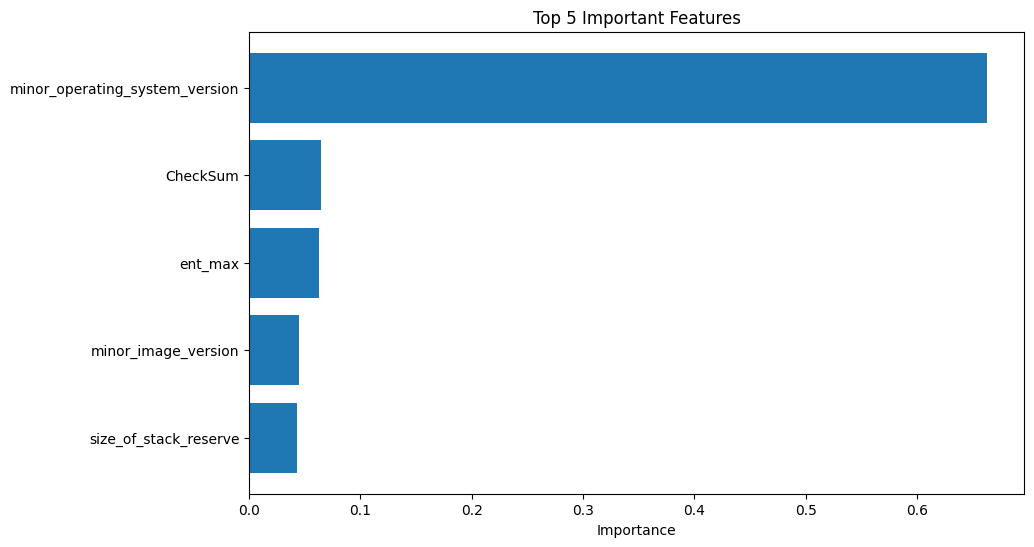

In [47]:
# Drops all Missing values in Label and selects the Feature Column
x = MW_Data.drop('label', axis = 1)
y = MW_Data["label"]

# Split into Training and Test Sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

# Initializes the Decision Tree and fits the model.
dtc = DecisionTreeClassifier()
dTree1 = DecisionTreeClassifier(class_weight= None)
dTree1.fit(x_train, y_train)

feature_importances = dTree1.feature_importances_
sorted_idx = feature_importances.argsort()[-5:][::-1]

plt.figure(figsize=(10, 6))
plt.barh(x.columns[sorted_idx], feature_importances[sorted_idx], align='center')
plt.xlabel('Importance')
plt.title('Top 5 Important Features')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

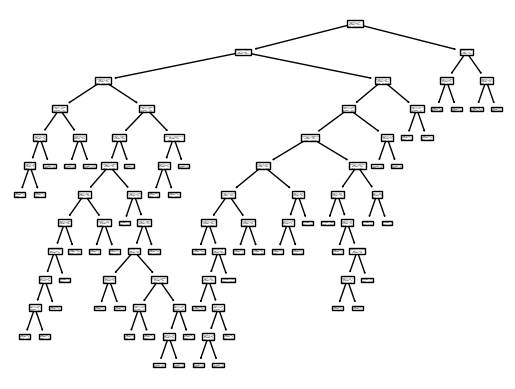

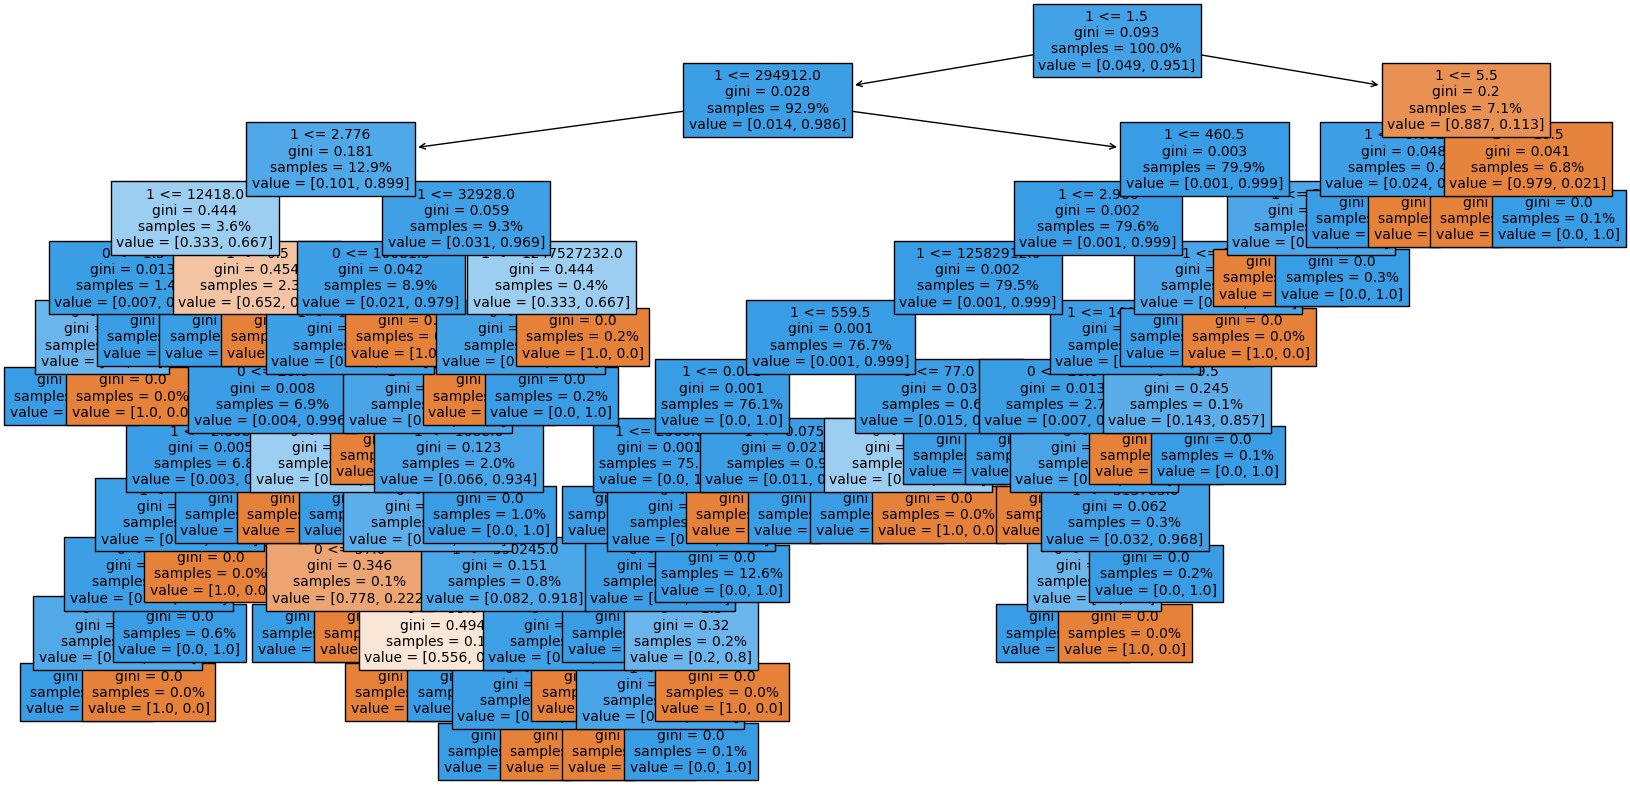

In [55]:
# Drops all Missing values in Label and selects the Feature Column
x = MW_Data.drop('label', axis = 1)
y = MW_Data["label"]

# Split into Training and Test Sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

# Initializes the Decision Tree and fits the model.
dTree2 = DecisionTreeClassifier(class_weight= {1:2, 0:1})
dTree2.fit(x_train, y_train)
tree.plot_tree(dTree2);
plt.figure(figsize=(20, 10))
plot_tree(dTree2, filled=True, feature_names=MW_Data["label"], proportion=True, fontsize=10)
plt.show()

label
1    5101
0    5101
Name: count, dtype: int64


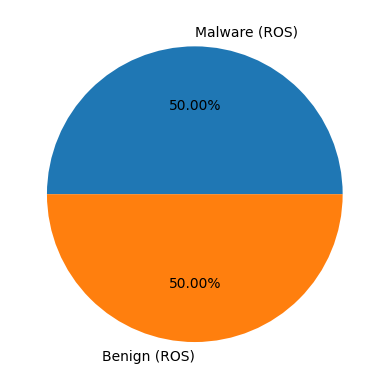

In [ ]:
ros = RandomOverSampler(random_state=42)
x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)

MW_Data = pd.concat([pd.DataFrame(x_train_resampled, columns=MW_Data.columns[:-1]), pd.DataFrame(y_train_resampled, columns=['label'])], axis=1)


# Counts number of 0 or 1, occurences within the data. Will be used in Pie chart
MW_Data_count = MW_Data["label"].value_counts()
print(MW_Data_count)
Not_Malware_count = MW_Data_count[1]
Malware_count = MW_Data_count[0]

# Code for Pie chart.
pie_labels = "Malware (ROS)", "Benign (ROS)"
pie_sizing = [int(Malware_count), int(Not_Malware_count)]

fig, ax = plt.subplots()
ax.pie(pie_sizing, labels=pie_labels, autopct='%1.2f%%');

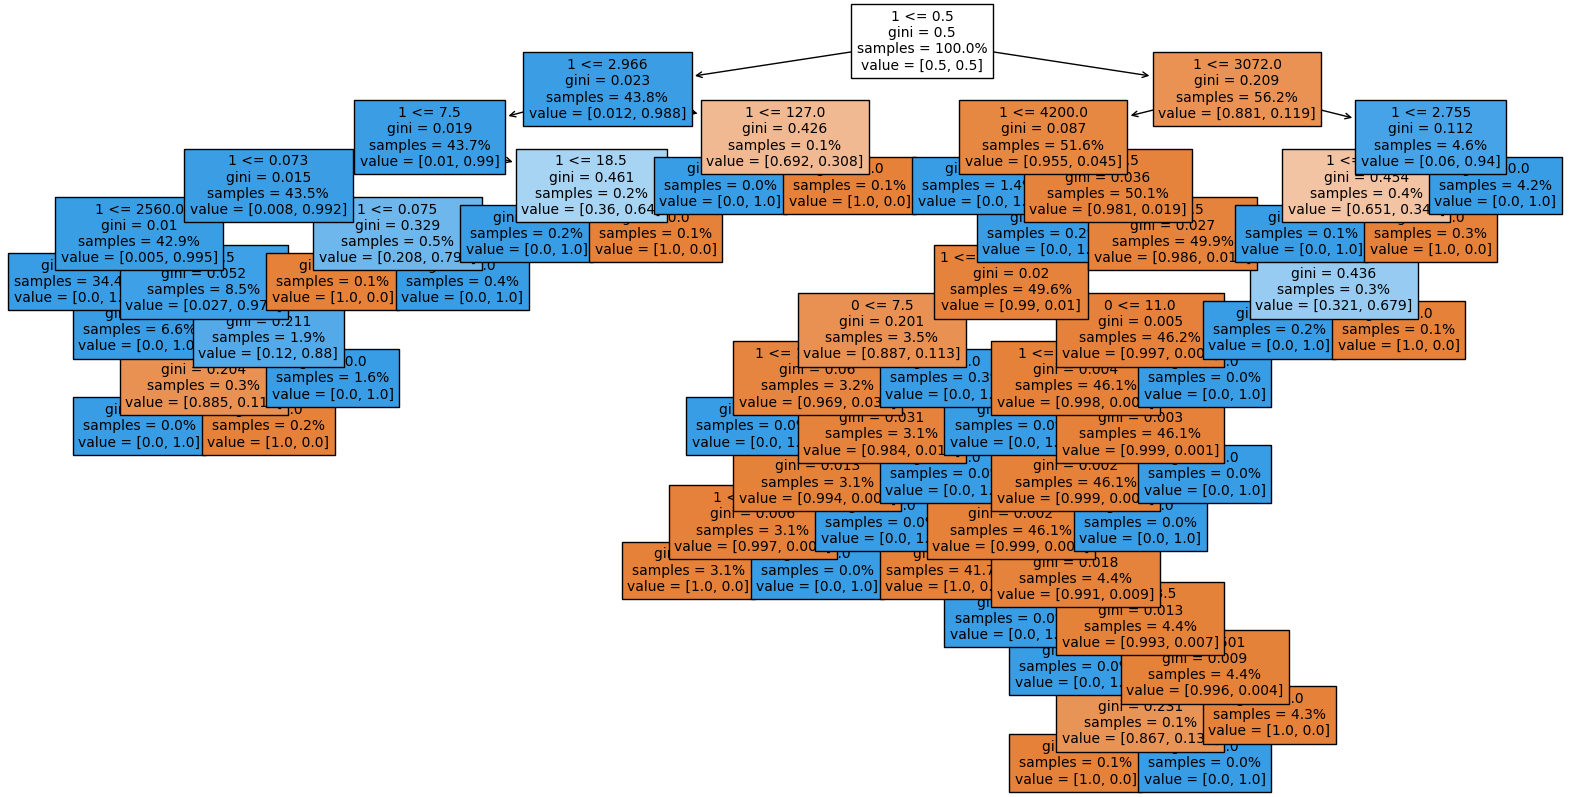

In [56]:
dTree2 = DecisionTreeClassifier(random_state=42)
dTree2.fit(x_train_resampled, y_train_resampled)
plt.figure(figsize=(20, 10))
plot_tree(dTree2, filled=True, feature_names=MW_Data["label"], proportion=True, fontsize=10)
plt.show()

In [ ]:
y_pred = dTree2.predict(x_test)

In [ ]:
y_pred_proba = dTree2.predict_proba(x_test)[:, 1]  # Assuming model is your trained classifier


In [ ]:
# Prints out Relevant Metrics
print("Accuracy: ", accuracy_score(y_test, y_pred))

print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))

print("F1 Score: ", f1_score(y_test, y_pred))

print("Precision:", precision_score(y_test, y_pred))

print("Recall: ", recall_score(y_test, y_pred))

Accuracy:  0.9952
AUC-ROC: 0.9913390907286083
F1 Score:  0.9972801450589303
Precision: 0.9981851179673321
Recall:  0.9963768115942029
